In [ ]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
import torch
from torch import nn
from torch_geometric.loader import DataLoader
from models import FRGT
from datatools import CFDGraphsDataset
from box import Box
import yaml
import os
from utils import plot_single_model_comparison
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib import rcParams
rcParams["font.family"] = "serif"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
run = r'B:\runs\FRGT_runs\Final\comp1\proc_hgt_dim_160_uid_1Z9V'
model_version = 'e500'
test_set = r'B:\datasets\FRGT_dataset\test_dataset.zip'

In [ ]:
# load the config file
config = Box.from_yaml(filename=os.path.join(run, 'config.yml'), Loader=yaml.FullLoader)

# init dataset and dataloader
dataset = CFDGraphsDataset(zip_path=test_set, random_masking=False, zero_augmentation=False,
                            rd_in_polar_coords= config.hyperparameters.rd_in_polar_coords,
                            farfield_mag_aoa=config.hyperparameters.farfield_mag_aoa,
                            airfoil_coverage=1.0)

test_loader = DataLoader(dataset, batch_size=1, shuffle=False)

# initialize the model
model = FRGT(**config.data_dims, **config.hyperparameters, **config.model_settings)

# use gpu if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# load the model and the training stats
checkpoint = torch.load(os.path.join(run, 'trained_models/{}.pt'.format(model_version)), map_location=device)
glob_norm_vals = checkpoint['glob_norm_vals']
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)
model.eval()
print('model loaded')


model loaded


[ 41 106  17 152 127 128]


d:\PhD\FR-GT\notebooks\..\utils\single_model_plotter.py:270: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


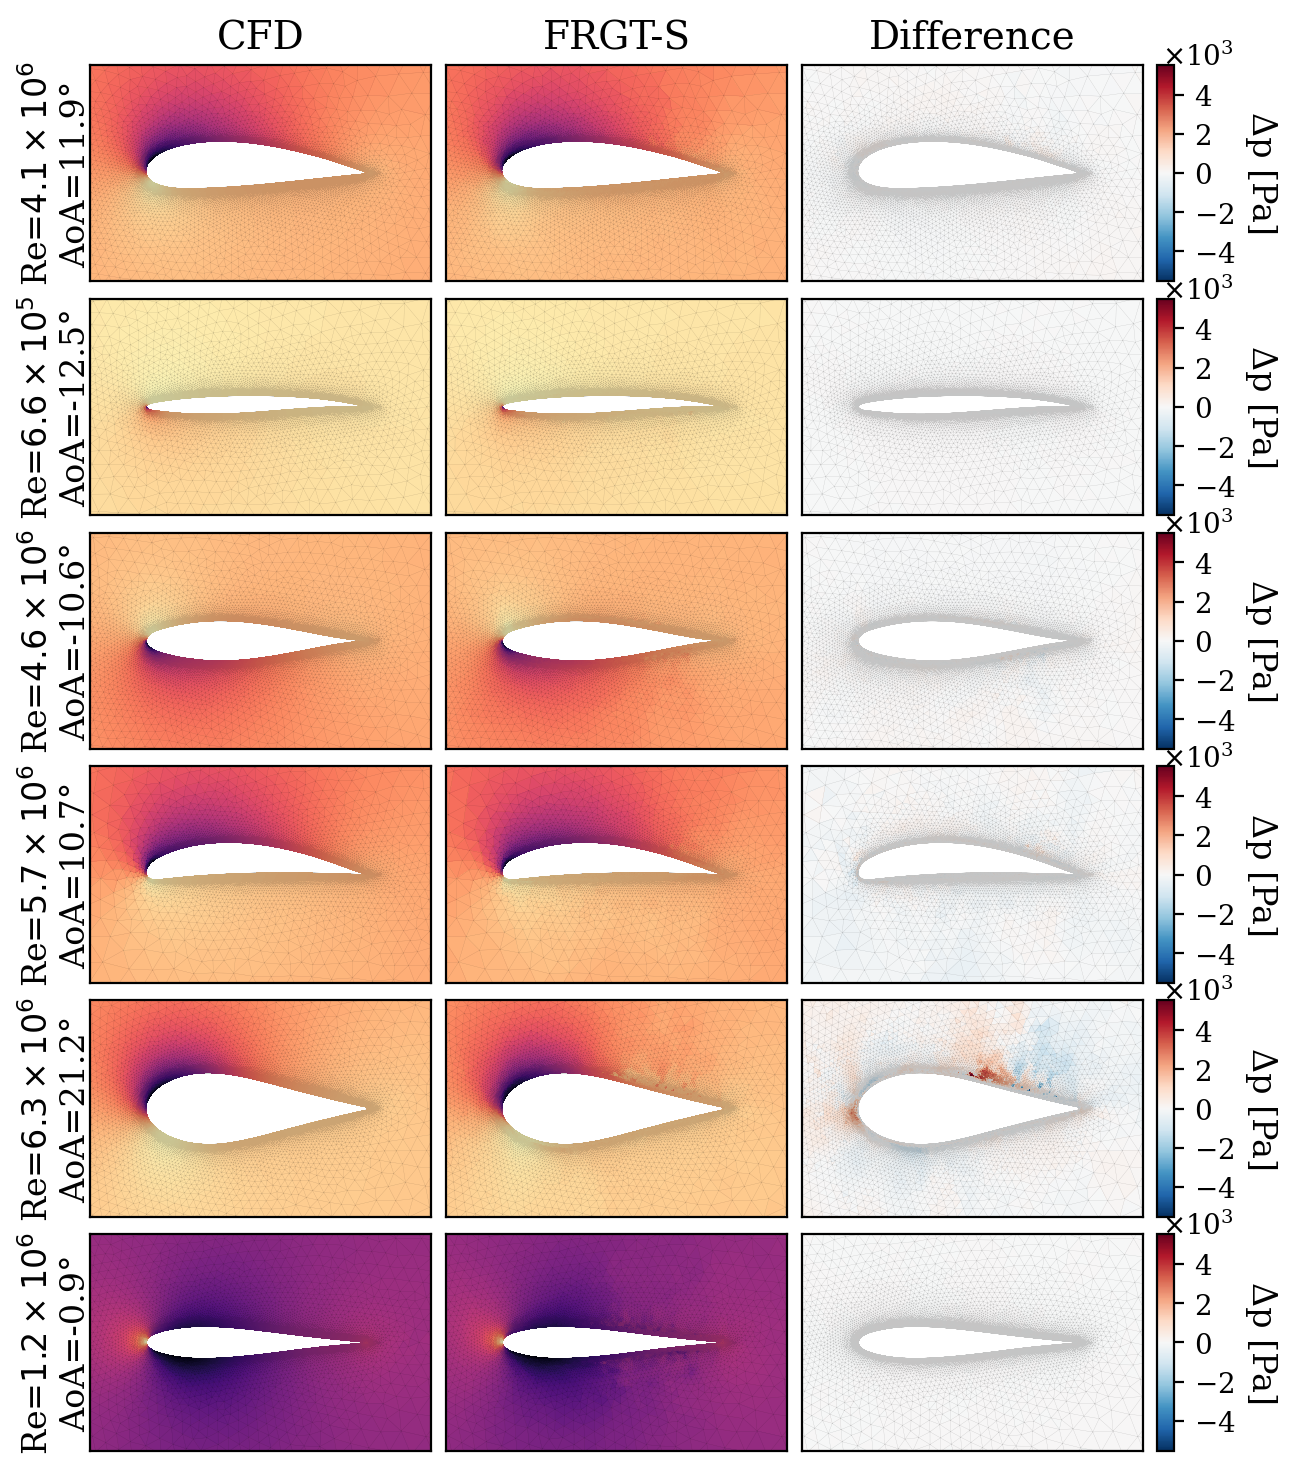

In [13]:

gts = []
preds = []

samples = np.random.choice(len(dataset), 6, replace=False)
# samples =[ 1,  31,  33,  63]
print(samples)
with torch.no_grad():
    for i in samples:
        data = dataset[i]
        data.y = data.y * data.node_norm_vals[:, 1] + data.node_norm_vals[:, 0]
        gts.append(data.clone())
        
        data.batch = torch.zeros(data.num_nodes, dtype=torch.long)
        data = data.to(device)
        data_pred = model(data.clone())
        data_pred.y = data_pred.x * data_pred.node_norm_vals[:, 1] + data_pred.node_norm_vals[:, 0]
        preds.append(data_pred)

xlims = (-0.25, 1.295)
ylims = (-0.49, 0.49)


plot_types = ['p']*len(gts)
colormaps=['magma']*len(gts)

# plot_types = ['u_mag', 'u_mag', 'p']
# colormaps=['viridis', 'viridis', 'magma']

fig = plot_single_model_comparison(gts, preds, plot_types=plot_types, xlimits=xlims, ylimits=ylims, 
                         fig_size=(7, 1.5), dpi=200, show_triangles=True, show_colorbar=True,
                         num_ticks=6, cbar_font_size=12, title_font_size=14, 
                         colormaps=colormaps, 
                         baseline_title="CFD", prediction_title="FRGT-S",
                         add_farfield_info=True)

[85, 127, 141, 63]


d:\PhD\FR-GT\notebooks\..\models\feature_propagation.py:75: UserWarning: torch.sparse.SparseTensor(indices, values, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, dtype=, device=). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:634.)
  adj = torch.sparse.FloatTensor(edge_index, values=edge_weight).to(edge_index.device)
d:\PhD\FR-GT\notebooks\..\utils\single_model_plotter.py:270: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


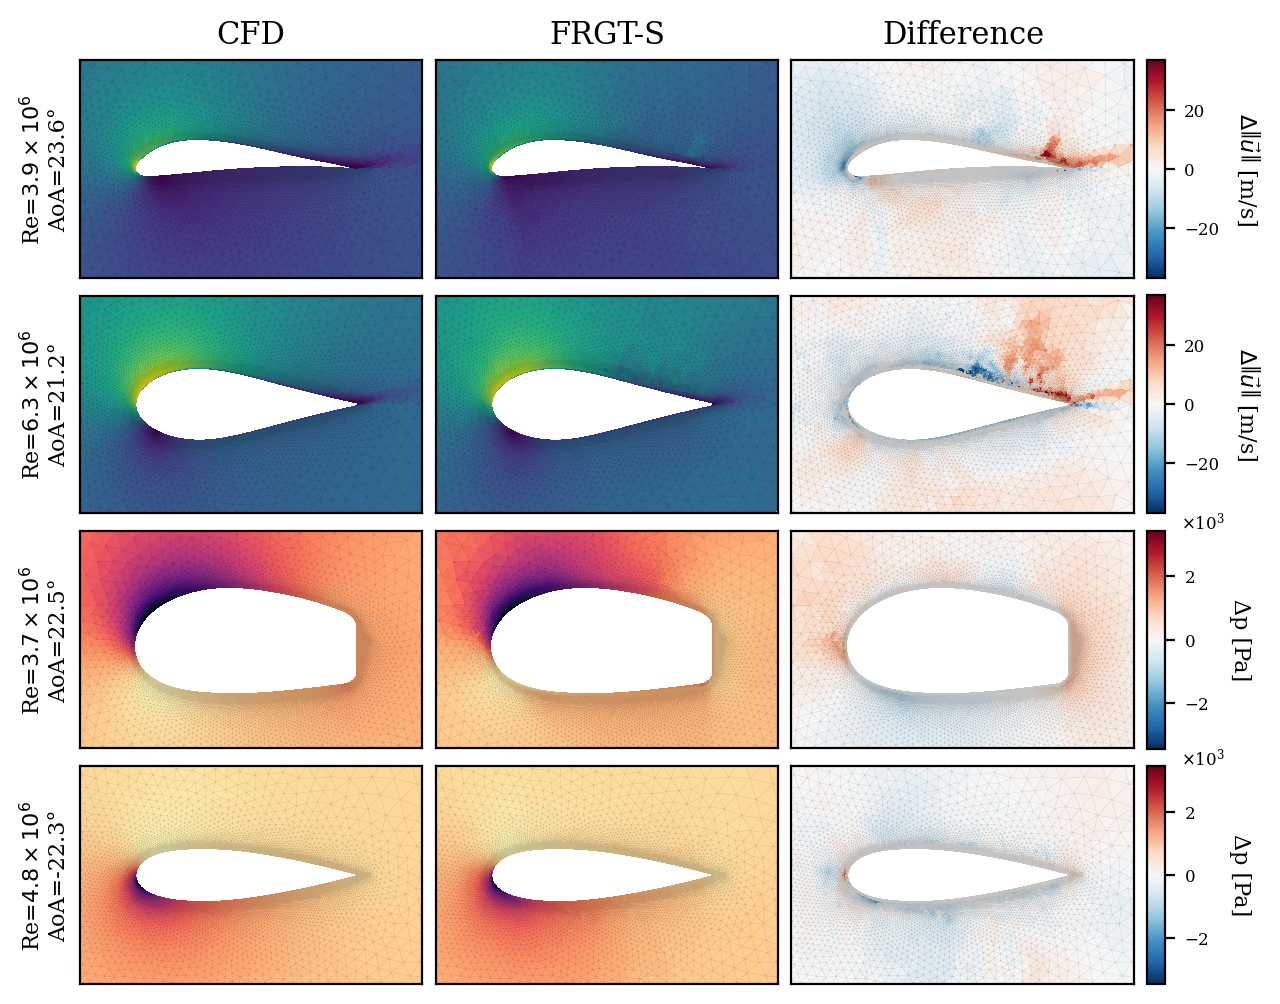

In [ ]:
gts = []
preds = []

samples = np.random.choice(len(dataset), 6, replace=False)
samples =[85, 127,141, 63]
print(samples)
with torch.no_grad():
    for i in samples:
        data = dataset[i]
        data.y = data.y * data.node_norm_vals[:, 1] + data.node_norm_vals[:, 0]
        gts.append(data.clone())
        
        data.batch = torch.zeros(data.num_nodes, dtype=torch.long)
        data = data.to(device)
        data_pred = model(data.clone())
        data_pred.y = data_pred.x * data_pred.node_norm_vals[:, 1] + data_pred.node_norm_vals[:, 0]
        preds.append(data_pred)

xlims = (-0.25, 1.295)
ylims = (-0.49, 0.49)



plot_types = ['u_mag', 'u_mag', 'p', 'p']
colormaps=['viridis', 'viridis', 'magma', 'magma']


fig_h = 0.75*len(gts)

fig = plot_single_model_comparison(gts, preds, plot_types=plot_types, xlimits=xlims, ylimits=ylims, 
                         fig_size=(7, 1.5), dpi=200, show_triangles=True, show_colorbar=True,
                         num_ticks=4, cbar_font_size=8, title_font_size=11, 
                         colormaps=colormaps, 
                         baseline_title="CFD", prediction_title="FRGT-S",
                         add_farfield_info=True)


In [14]:
to_keep1 = [16,  99, 0]
to_keep2 = [66,  87, 124]

test_set = r'B:\datasets\FRGT_dataset\test_dataset.zip'
dataset = CFDGraphsDataset(zip_path=test_set, random_masking=False, zero_augmentation=False,
                            rd_in_polar_coords= config.hyperparameters.rd_in_polar_coords,
                            farfield_mag_aoa=config.hyperparameters.farfield_mag_aoa,
                            airfoil_coverage=1.0)

gts = []
preds = []

with torch.no_grad():
    for i in to_keep2:
        data = dataset[i]
        data.y = data.y * data.node_norm_vals[:, 1] + data.node_norm_vals[:, 0]
        gts.append(data.clone())
        
        data.batch = torch.zeros(data.num_nodes, dtype=torch.long)
        data = data.to(device)
        data_pred = model(data.clone())
        data_pred.y = data_pred.x * data_pred.node_norm_vals[:, 1] + data_pred.node_norm_vals[:, 0]
        preds.append(data_pred)
        
test_set = r'B:\datasets\FRGT_dataset\valid_dataset.zip'
dataset = CFDGraphsDataset(zip_path=test_set, random_masking=False, zero_augmentation=False,
                            rd_in_polar_coords= config.hyperparameters.rd_in_polar_coords,
                            farfield_mag_aoa=config.hyperparameters.farfield_mag_aoa,
                            airfoil_coverage=1.0)

with torch.no_grad():
    for i in to_keep1:
        data = dataset[i]
        data.y = data.y * data.node_norm_vals[:, 1] + data.node_norm_vals[:, 0]
        gts.append(data.clone())
        
        data.batch = torch.zeros(data.num_nodes, dtype=torch.long)
        data = data.to(device)
        data_pred = model(data.clone())
        data_pred.y = data_pred.x * data_pred.node_norm_vals[:, 1] + data_pred.node_norm_vals[:, 0]
        preds.append(data_pred)
        

d:\PhD\FR-GT\notebooks\..\utils\single_model_plotter.py:270: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


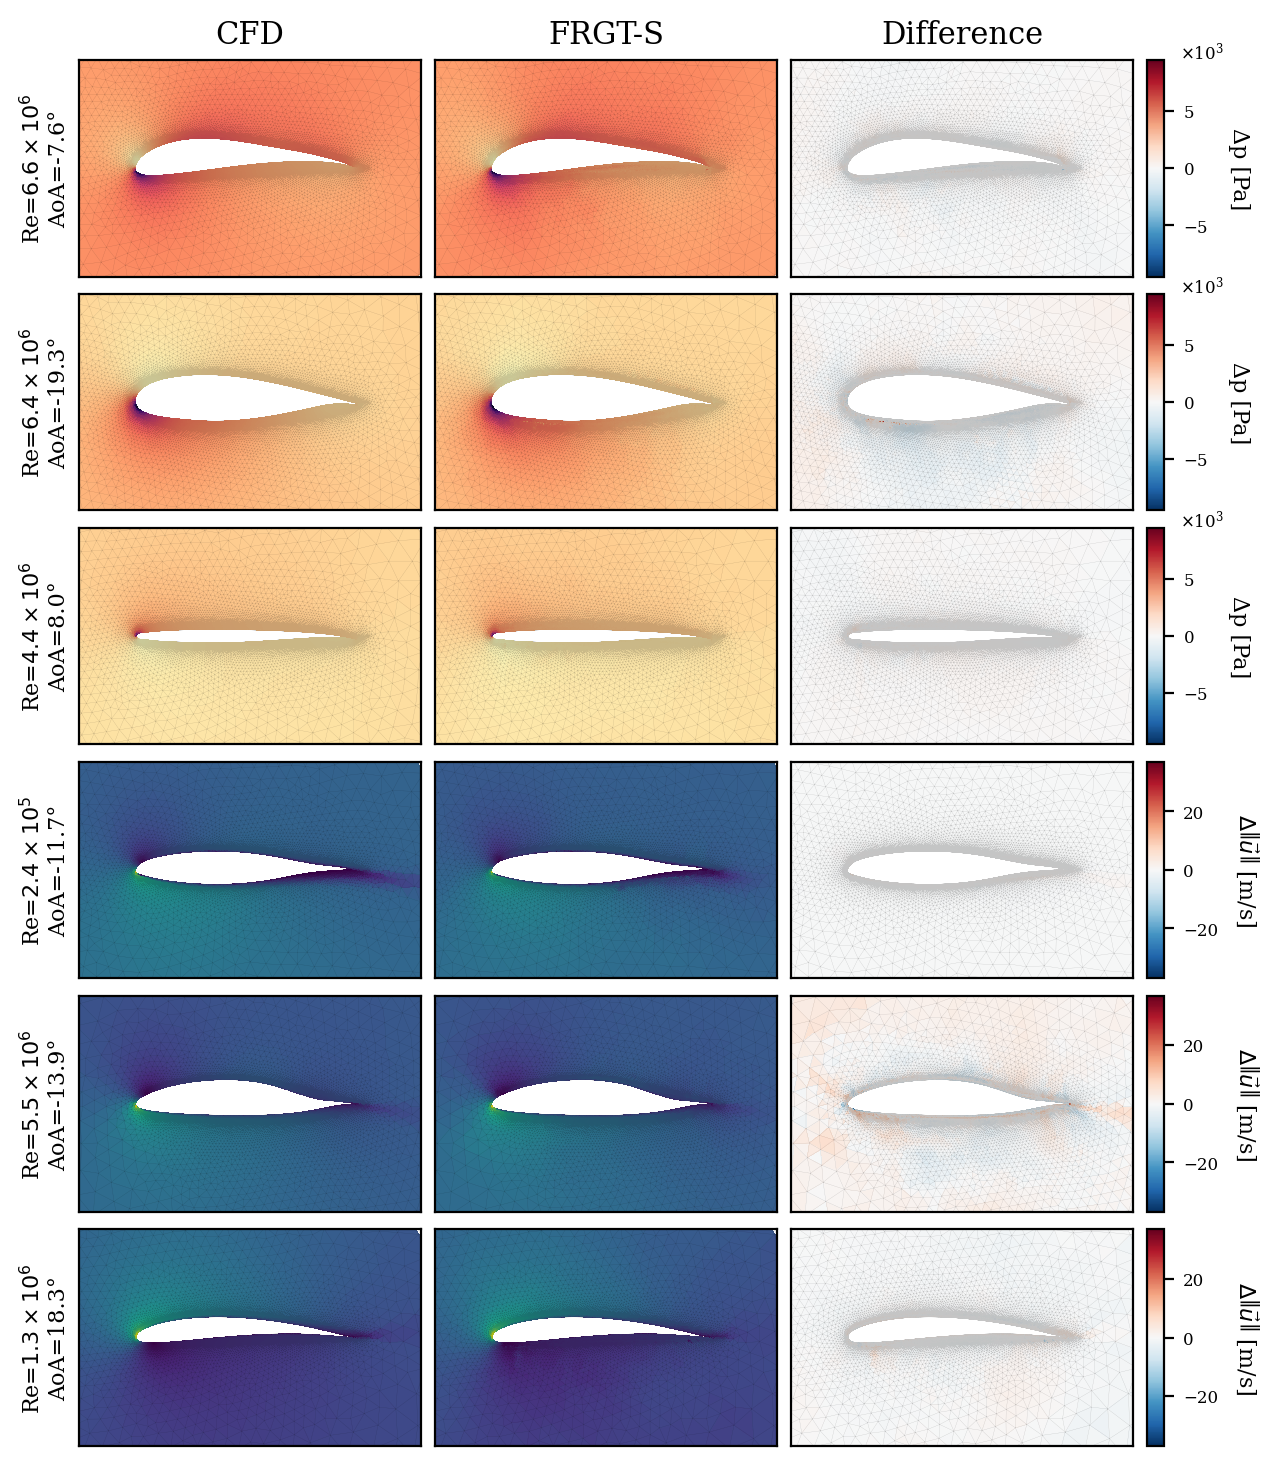

In [ ]:
xlims = (-0.25, 1.295)
ylims = (-0.49, 0.49)

plot_types = ['p']*3 + ['u_mag']*3
colormaps=['magma']*3 + ['viridis']*3


fig = plot_single_model_comparison(gts, preds, plot_types=plot_types, xlimits=xlims, ylimits=ylims, 
                         fig_size=(7, 1.5), dpi=200, show_triangles=True, show_colorbar=True,
                         num_ticks=4, cbar_font_size=8, title_font_size=11, 
                         colormaps=colormaps, 
                         baseline_title="CFD", prediction_title="FRGT-S",
                         add_farfield_info=True)
